# Surface concentrations

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from itertools import compress
import datetime as dt

%matplotlib notebook

###### Parameters:

In [3]:
imin, imax = 1100, 2050
jmin, jmax = 160, 800

# model results:
results_folder = '/data/brogalla/run_storage/pb-bdy7/'
year  = 2002

###### Load files:

In [4]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [5]:
ref1   = nc.Dataset(results_folder+'ANHA12_EXH006_1ts_20020101_20021231_debug_2002010100-2002010100.nc',  'r')
ref2   = nc.Dataset(results_folder+'ANHA12_EXH006_1ts_20020101_20021231_debug_2002010101-2002010101.nc',  'r')
lons   = np.array(ref1.variables['nav_lon'])
lats   = np.array(ref1.variables['nav_lat'])
depth  = np.array(ref1.variables['deptht'])
dissolpb1 = np.array(ref1.variables['dissolpb']) 
dissolpb2 = np.array(ref2.variables['dissolpb']) 

In [6]:
print(dissolpb1.shape)

(20, 50, 950, 640)


##### Figures of surface concentrations:

Check the boundary conditions:

In [7]:
bc = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Pb_OBC-20200403.nc', 'r')

In [8]:
dPbS = np.array(bc.variables['dPb_S'])
dPbE = np.array(bc.variables['dPb_E'])
dPbN = np.array(bc.variables['dPb_N'])

In [12]:
print('Southern BC max, min, ave: ', np.amax(dPbS), '    ', np.amin(dPbS), '    ', np.average(dPbS))
print('Eastern  BC max, min, ave: ', np.amax(dPbE), '  ', np.amin(dPbE), '    ', np.average(dPbE))
print('Northern BC max, min, ave: ', np.amax(dPbN), '    ', np.amin(dPbN), '    ', np.average(dPbN))

Southern BC max, min, ave:  3e-11      7e-12      1.4345092127303182e-11
Eastern  BC max, min, ave:  1.9e-11    1e-12      5.393199577613519e-12
Northern BC max, min, ave:  9e-12      1e-12      3.170184254606365e-12


#### Time step = 1 (initial conditions)

<IPython.core.display.Javascript object>


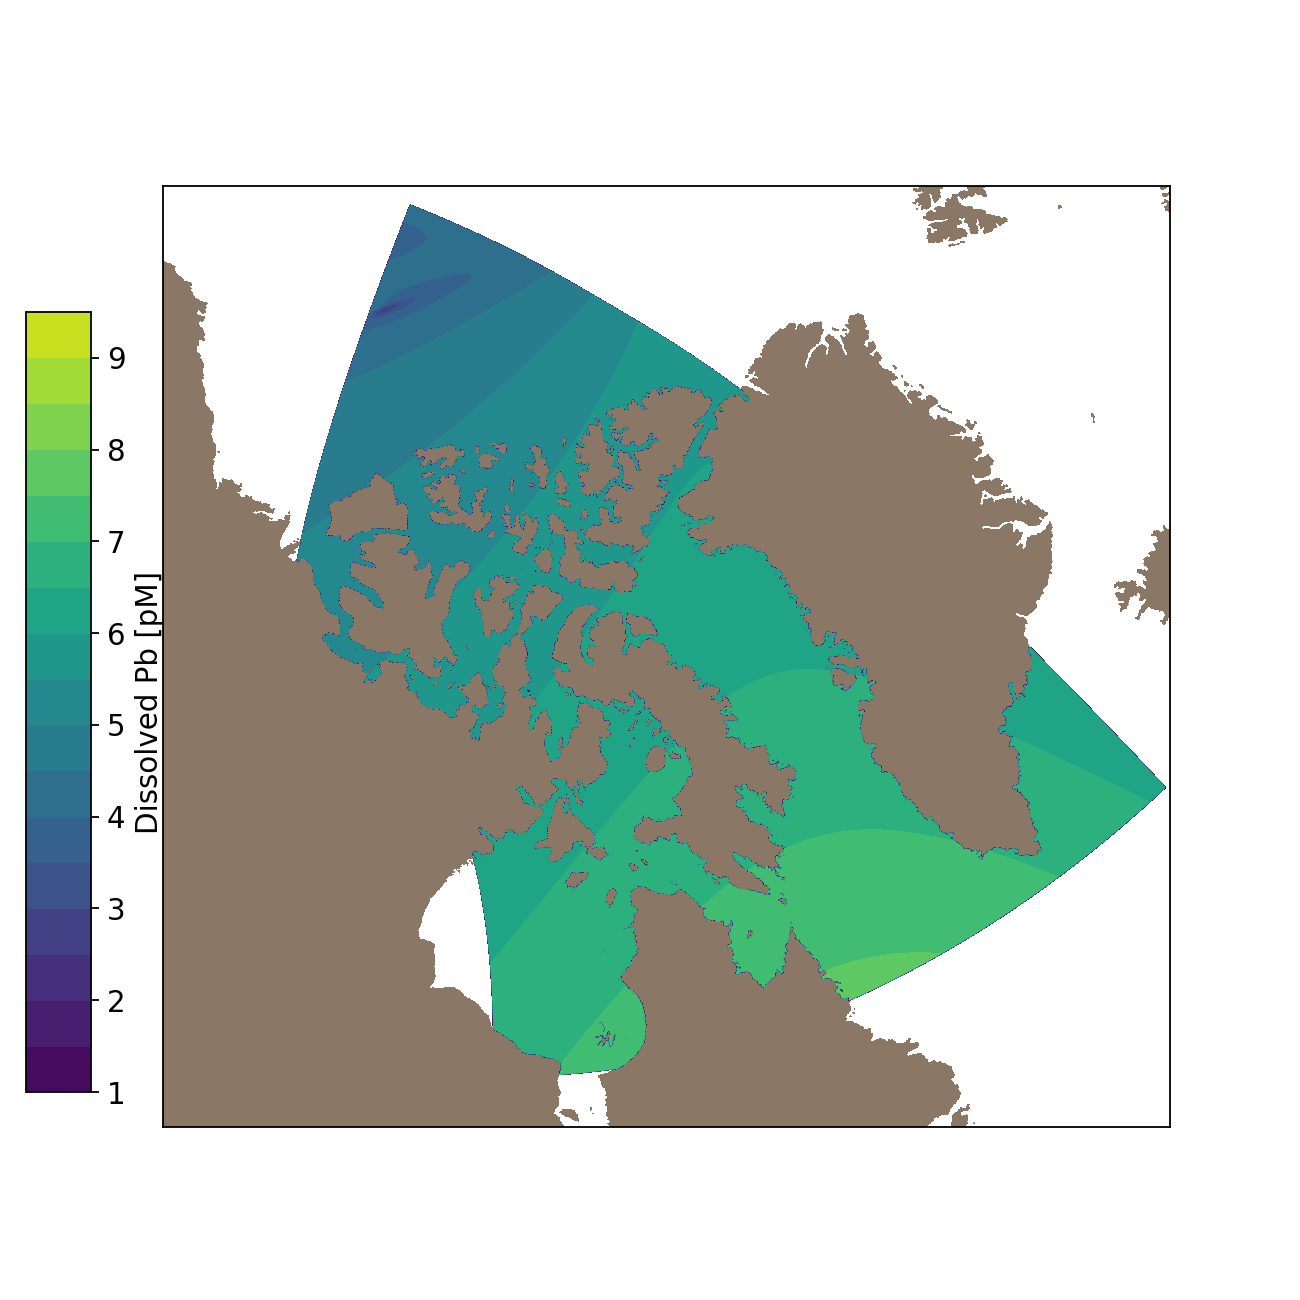

In [14]:
ts=0
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb.pickle','rb'))

vminpb = 1
vmaxpb = 10

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolpb1[ts,layer,:,:]*10**(12), \
                        np.arange(vminpb, vmaxpb,0.5), vmin=vminpb, vmax=vmaxpb)

cbar_ax = fig.add_axes([0.02, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Pb [pM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


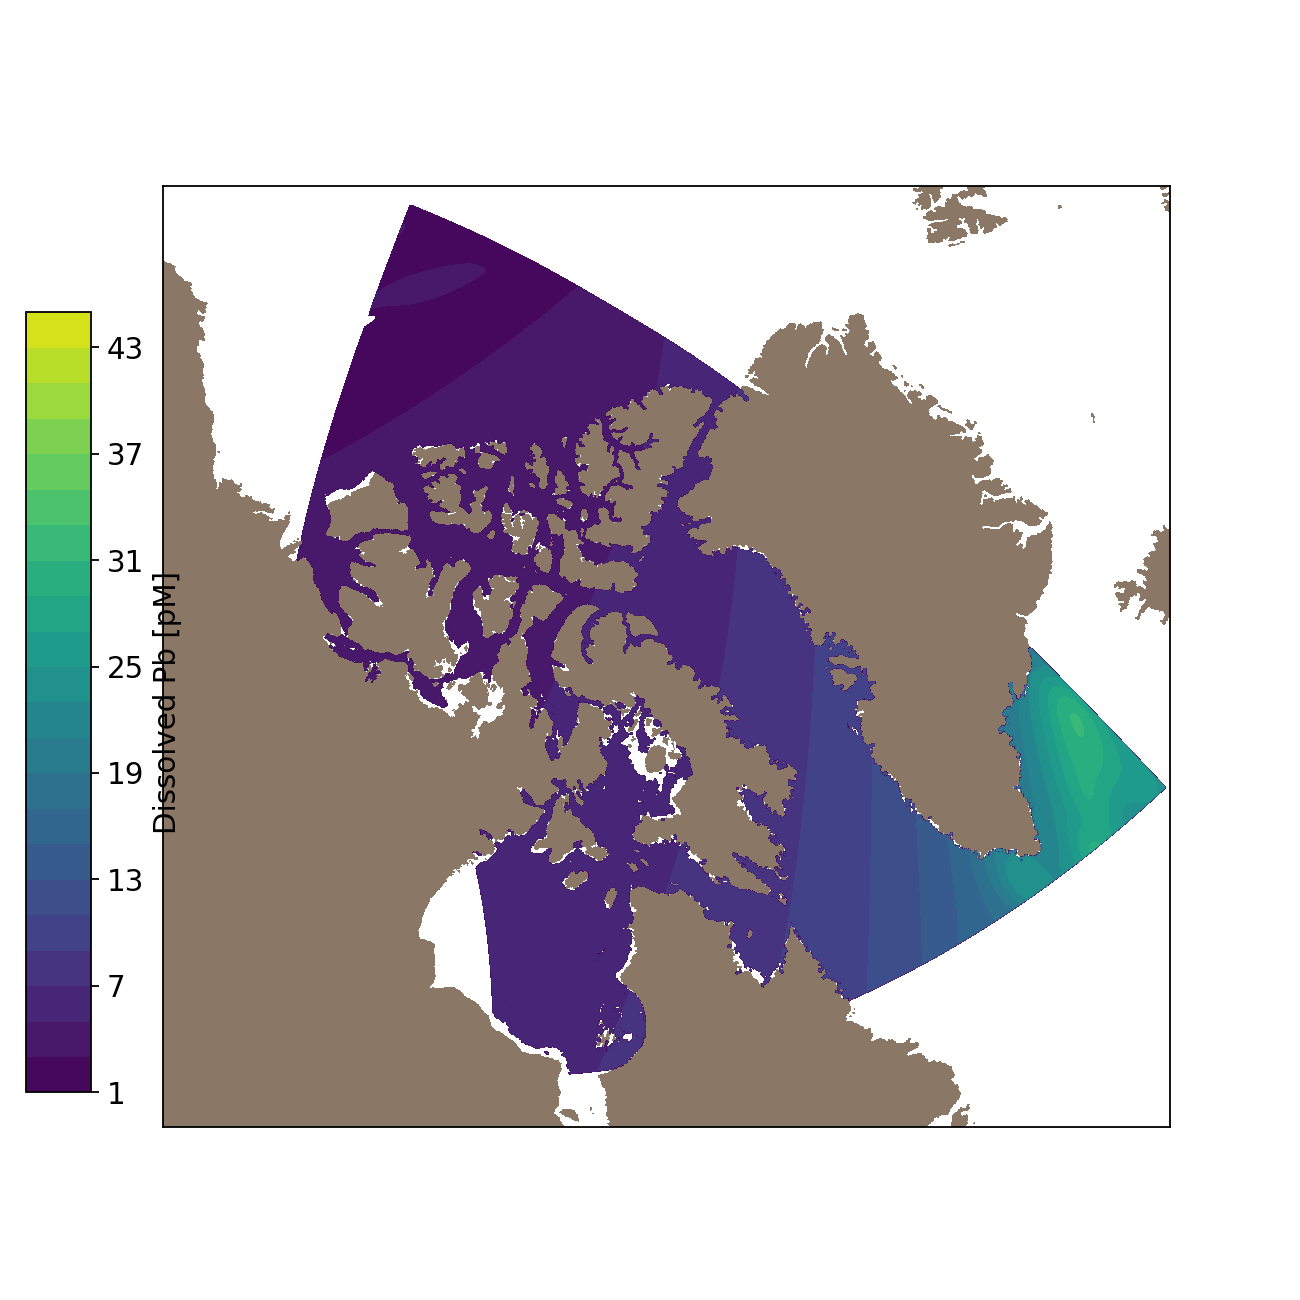

In [44]:
ts=0
layer=15

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb.pickle','rb'))

vminpb = 1
vmaxpb = 47

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolpb1[ts,layer,:,:]*10**(12), \
                        np.arange(vminpb, vmaxpb,2), vmin=vminpb, vmax=vmaxpb)

cbar_ax = fig.add_axes([0.02, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Pb [pM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

#### Timestep = 2:

<IPython.core.display.Javascript object>


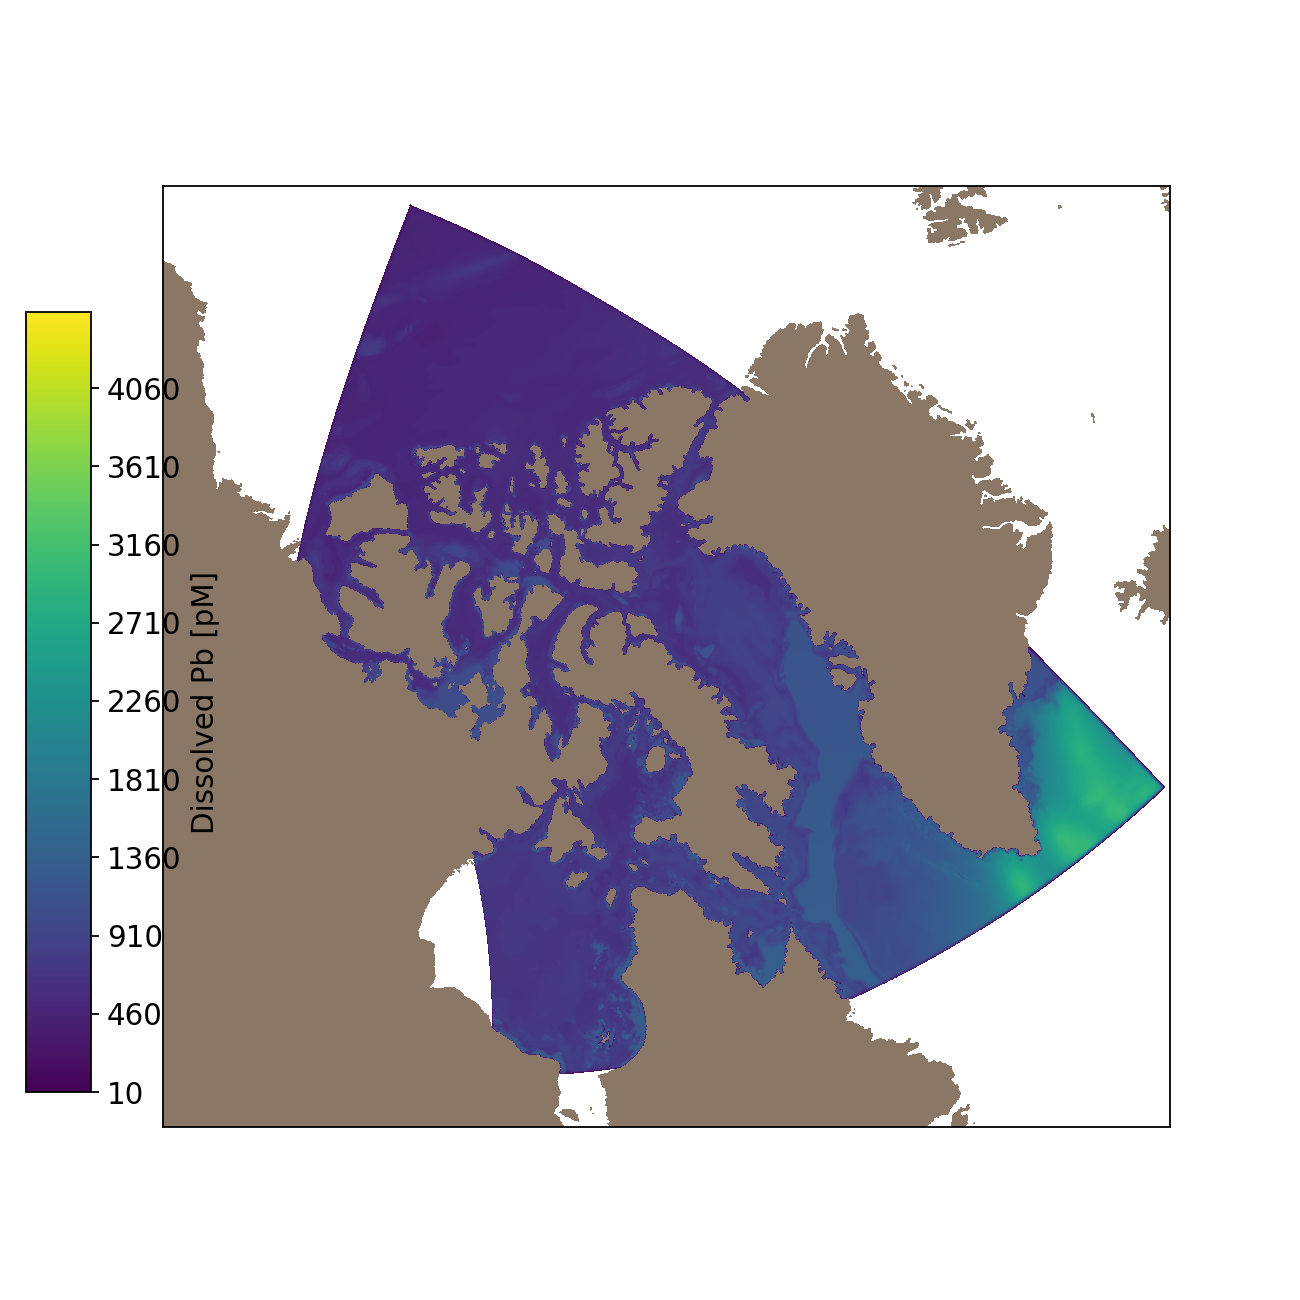

In [15]:
ts=1
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb.pickle','rb'))

vminpb = 10
vmaxpb = 4500

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolpb1[ts,layer,:,:]*10**(12), \
                        np.arange(vminpb, vmaxpb,2), vmin=vminpb, vmax=vmaxpb)

cbar_ax = fig.add_axes([0.02, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Pb [pM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


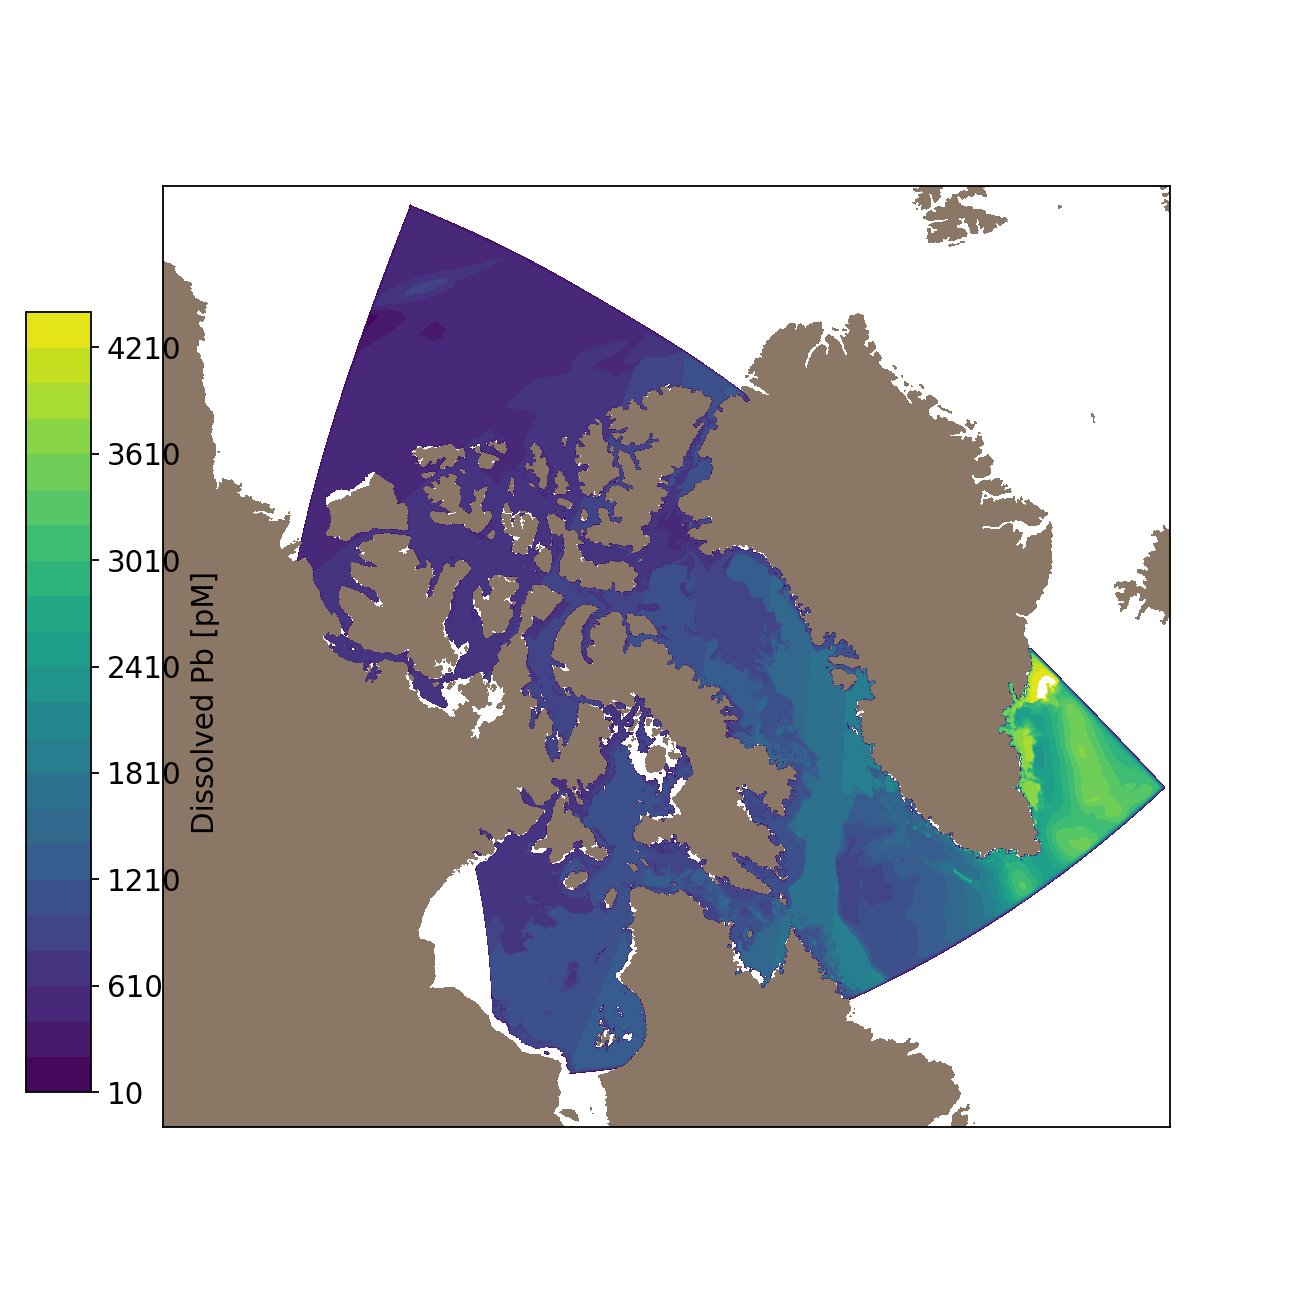

In [30]:
ts=1
layer=15

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb.pickle','rb'))

vminpb = 10 
vmaxpb = 4500

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolpb1[ts,layer,:,:]*10**(12), \
                        np.arange(vminpb, vmaxpb,200), vmin=vminpb, vmax=vmaxpb)

cbar_ax = fig.add_axes([0.02, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Pb [pM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

<IPython.core.display.Javascript object>


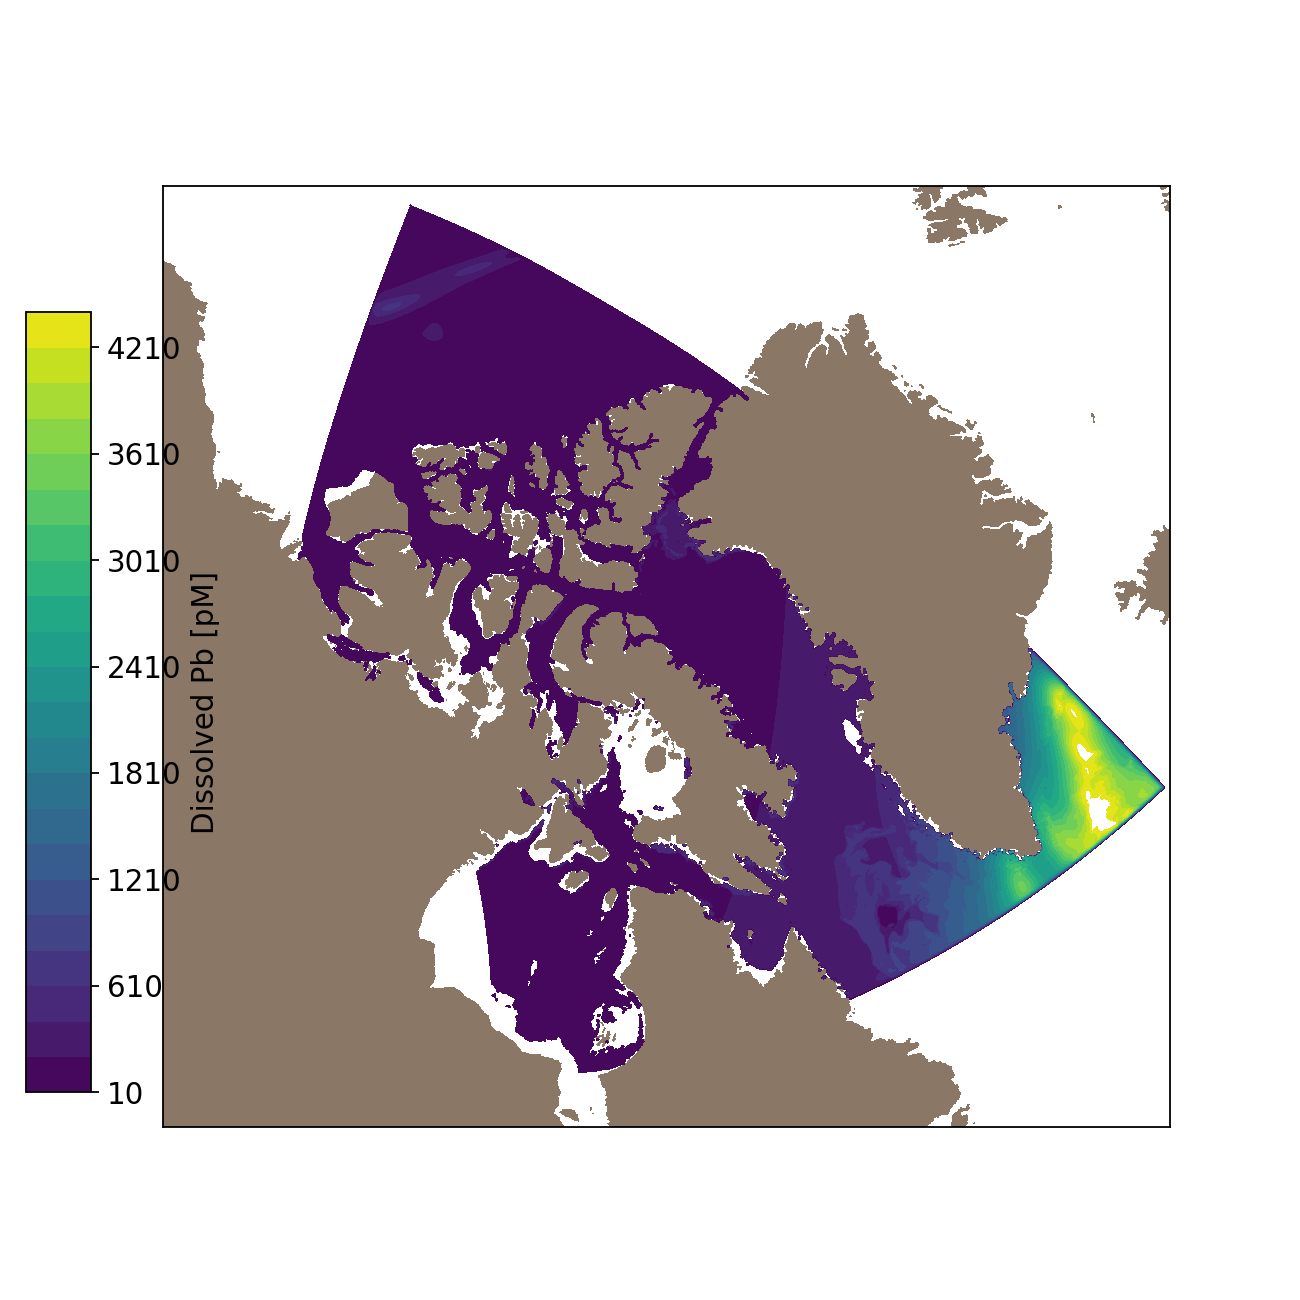

In [31]:
ts=1
layer=20

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb.pickle','rb'))

vminpb = 10 
vmaxpb = 4500

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolpb1[ts,layer,:,:]*10**(12), \
                        np.arange(vminpb, vmaxpb,200), vmin=vminpb, vmax=vmaxpb)

cbar_ax = fig.add_axes([0.02, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Pb [pM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)

#### Timestep = 3:

<IPython.core.display.Javascript object>


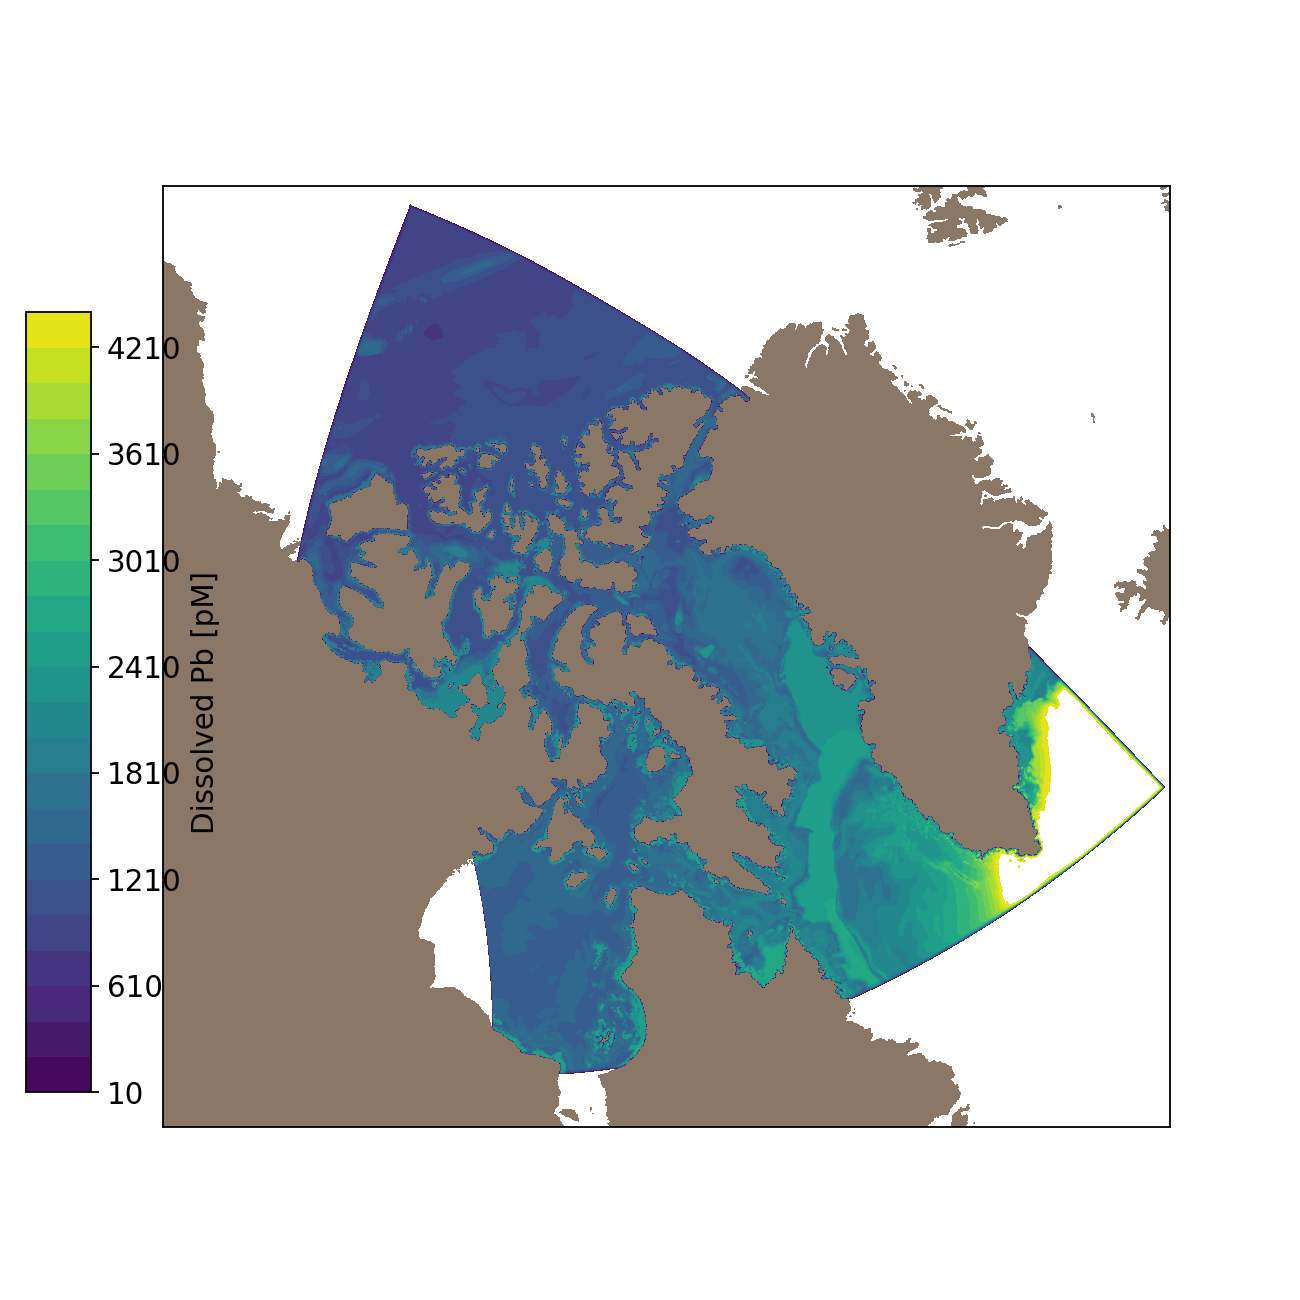

In [32]:
ts=2
layer=0

fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/surface-Pb.pickle','rb'))

vminpb = 10 
vmaxpb = 4500

x, y = proj1(lons, lats)
    
contour = proj1.contourf(x, y, dissolpb1[ts,layer,:,:]*10**(12), \
                        np.arange(vminpb, vmaxpb,200), vmin=vminpb, vmax=vmaxpb)

cbar_ax = fig.add_axes([0.02, 0.16, 0.05, 0.6])
cbar    = fig.colorbar(contour, cax=cbar_ax)
cbar.set_label('Dissolved Pb [pM]', fontsize=13) 
cbar_ax.tick_params(axis='both', which='major', labelsize=13)